# Comparing Vegas generated without scanning with the KDE prediction in observables

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from parameters_dict import physics_parameters
from exp_analysis_class import exp_analysis
from plot_utils import *
from dark_nus_utils import load_datasets

0.0009866349020787781


In [3]:
save_folder_lin = '../fig/3_comparison_observables/'
save_folder_log = '../fig/3_comparison_observables/'
!mkdir -p $save_folder_lin
!mkdir -p $save_folder_log

## Use this to load the datasets in the usual way and dump them in pickle files

In [4]:
# my_exp_analyses = load_datasets('heavy', 'majorana', dump=True, timeit=True)

## Use the function this way to load the datasets from the pickle files

In [5]:
my_exp_analyses = load_datasets('heavy', 'majorana', timeit=True, direct_load_objects=True)

heavy majorana
Wall time: 34.7541344165802 s, CPU time: 2.166885694


## Validate the equivalence between previous and new methods

In [123]:
this_exp_analysis = my_exp_analyses['heavy_majorana']
m4mz = (0.1, 1.25)
aux_df = this_exp_analysis.df_base.query('cut_based')

In [124]:
this_exp_analysis.kde_n_events(aux_df,
                               m4mz=m4mz,
                               ctau=0.01,
                               provide_n_samples=True)

(10.761076633042538, 32.94136460993455, 1546, 8)

In [125]:
this_exp_analysis.kde_n_events_new(aux_df,
                               m4mz=m4mz,
                               ctau=0.01,
                               provide_n_samples=True)

(8.330824879290464, 69.40264316642138, 865763, 46)

In [126]:
out_old = []
out_new = []
ctaus = np.geomspace(1e-3, 1e3, 20)
for ctau in ctaus:
    out_old.append(this_exp_analysis.kde_n_events(aux_df,
                               m4mz=m4mz,
                           ctau=ctau,
                           provide_n_samples=True))
    out_new.append(this_exp_analysis.kde_n_events_new(aux_df,
                               m4mz=m4mz,
                           ctau=ctau,
                           provide_n_samples=True))
out_old = np.asarray(out_old)
out_new = np.asarray(out_new)

<ipython-input-128-7d85314c1ca0>:16: RuntimeWarning: divide by zero encountered in true_divide
  ax2.plot(ctaus, out_new[:, 0]/out_old[:, 0], 'k--')


Text(0.5, 1.0, 'heavy majorana, KDE, m4 = 0.1 GeV, mz = 1.25 GeV')

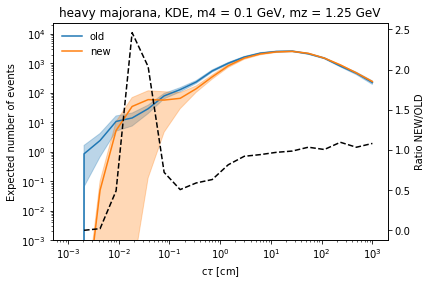

In [128]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

old_plot = ax1.plot(ctaus, out_old[:, 0], label='old')
ax1.fill_between(ctaus, out_old[:, 0]-np.sqrt(out_old[:, 1]), out_old[:, 0]+np.sqrt(out_old[:, 1]), 
                 color=old_plot[0].get_color(), alpha=0.3)
new_plot = ax1.plot(ctaus, out_new[:, 0], label='new')
ax1.fill_between(ctaus, out_new[:, 0]-np.sqrt(out_new[:, 1]), out_new[:, 0]+np.sqrt(out_new[:, 1]), 
                 color=new_plot[0].get_color(), alpha=0.3)
ax1.legend(frameon=False)
ax1.loglog()
ax1.set_ylim(bottom=1e-3)
ax1.set_xlabel(r'c$\tau$ [cm]')
ax1.set_ylabel(r'Expected number of events')

ax2.plot(ctaus, out_new[:, 0]/out_old[:, 0], 'k--')
ax2.set_ylabel(r'Ratio NEW/OLD')
ax1.set_title(f'heavy majorana, KDE, m4 = {m4mz[0]} GeV, mz = {m4mz[1]} GeV')

<ipython-input-129-4f1a12e3a4a9>:6: RuntimeWarning: invalid value encountered in true_divide
  old_plot_1 = ax1.plot(ctaus, np.sqrt(out_old[:, 1])/out_old[:, 0], color='C0', linestyle='-', label='old')


Text(0.5, 1.0, 'heavy majorana, KDE m4 = 0.1 GeV, mz = 1.25 GeV')

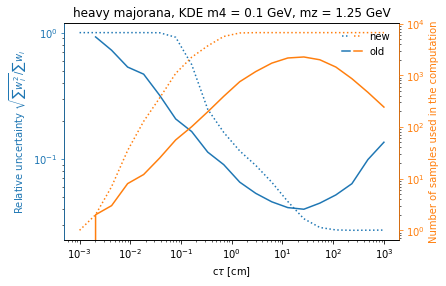

In [129]:
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

old_plot_1 = ax1.plot(ctaus, np.sqrt(out_old[:, 1])/out_old[:, 0], color='C0', linestyle='-', label='old')
new_plot_1 = ax1.plot(ctaus, np.sqrt(out_new[:, 1])/out_new[:, 0], color='C0', linestyle='dotted', label='new')
ax1.loglog()
ax1.set_xlabel(r'c$\tau$ [cm]')
ax1.set_ylabel(r'Relative uncertainty $\sqrt{\sum w_i^2}/\sum w_i$', color="C0")
ax1.tick_params(axis='y', colors="C0")
ax2.spines['left'].set_color("C0")  

old_plot_2 = ax2.plot(ctaus, out_old[:, 3], label='old', color='C1', linestyle='-')
new_plot_2 = ax2.plot(ctaus, out_new[:, 3], label='new', color='C1', linestyle='dotted')
ax2.set_yscale('log')
ax2.set_ylabel(r'Number of samples used in the computation', color="C1")
ax2.tick_params(axis='y', colors="C1")
ax2.spines['right'].set_color("C1")  

ax1.legend([(new_plot_1[0], new_plot_2[0]), (old_plot_1[0], old_plot_2[0])],
           ['new', 'old'], 
           frameon=False, 
           handler_map={tuple: HandlerTuple(ndivide=None)})
ax1.set_title(f'heavy majorana, KDE m4 = {m4mz[0]} GeV, mz = {m4mz[1]} GeV')

## Same exercise but without KDE this time

In [130]:
this_exp_analysis = my_exp_analyses['heavy_majorana']

In [156]:
m4mz = (0.01, 0.02)
aux_df = this_exp_analysis.dfs[m4mz].query('cut_based')

In [157]:
this_exp_analysis.kde_n_events(aux_df,
                               m4mz=None,
                               ctau=0.01,
                               provide_n_samples=True)

(112639060.14468372, 20821708917679.95, 2194, 2194)

In [158]:
this_exp_analysis.kde_n_events_new(aux_df,
                               m4mz=None,
                               ctau=0.01,
                               provide_n_samples=True)

(79438094.96302924, 583286462302361.1, 260525, 41559)

In [159]:
out_old = []
out_new = []
ctaus = np.geomspace(1e-3, 1e3, 20)
for ctau in ctaus:
    out_old.append(this_exp_analysis.kde_n_events(aux_df,
                               m4mz=None,
                           ctau=ctau,
                           provide_n_samples=True))
    out_new.append(this_exp_analysis.kde_n_events_new(aux_df,
                               m4mz=None,
                           ctau=ctau,
                           provide_n_samples=True))
out_old = np.asarray(out_old)
out_new = np.asarray(out_new)

Text(0.5, 1.0, 'heavy majorana, m4 = 0.01 GeV, mz = 0.02 GeV')

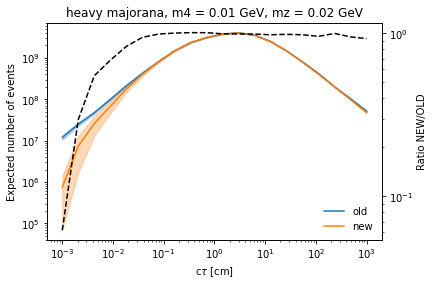

In [160]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

old_plot = ax1.plot(ctaus, out_old[:, 0], label='old')
ax1.fill_between(ctaus, out_old[:, 0]-np.sqrt(out_old[:, 1]), out_old[:, 0]+np.sqrt(out_old[:, 1]), 
                 color=old_plot[0].get_color(), alpha=0.3)
new_plot = ax1.plot(ctaus, out_new[:, 0], label='new')
ax1.fill_between(ctaus, out_new[:, 0]-np.sqrt(out_new[:, 1]), out_new[:, 0]+np.sqrt(out_new[:, 1]), 
                 color=new_plot[0].get_color(), alpha=0.3)

ax1.legend(frameon=False, loc='lower right')
ax1.loglog()
ax1.set_xlabel(r'c$\tau$ [cm]')
ax1.set_ylabel(r'Expected number of events')

ax2.plot(ctaus, out_new[:, 0]/out_old[:, 0], 'k--')
ax2.set_ylabel(r'Ratio NEW/OLD')
ax2.set_yscale('log')
ax1.set_title(f'heavy majorana, m4 = {m4mz[0]} GeV, mz = {m4mz[1]} GeV')

Text(0.5, 1.0, 'heavy majorana, m4 = 0.01 GeV, mz = 0.02 GeV')

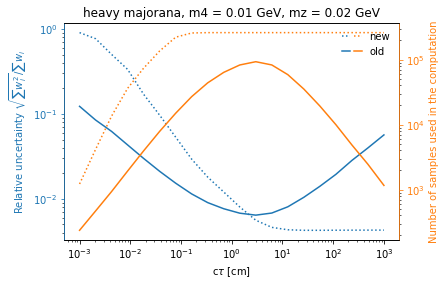

In [161]:
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

old_plot_1 = ax1.plot(ctaus, np.sqrt(out_old[:, 1])/out_old[:, 0], color='C0', linestyle='-', label='old')
new_plot_1 = ax1.plot(ctaus, np.sqrt(out_new[:, 1])/out_new[:, 0], color='C0', linestyle='dotted', label='new')
ax1.loglog()
ax1.set_xlabel(r'c$\tau$ [cm]')
ax1.set_ylabel(r'Relative uncertainty $\sqrt{\sum w_i^2}/\sum w_i$', color="C0")
ax1.tick_params(axis='y', colors="C0")
ax2.spines['left'].set_color("C0")  

old_plot_2 = ax2.plot(ctaus, out_old[:, 3], label='old', color='C1', linestyle='-')
new_plot_2 = ax2.plot(ctaus, out_new[:, 3], label='new', color='C1', linestyle='dotted')
ax2.set_yscale('log')
ax2.set_ylabel(r'Number of samples used in the computation', color="C1")
ax2.tick_params(axis='y', colors="C1")
ax2.spines['right'].set_color("C1")  

ax1.legend([(new_plot_1[0], new_plot_2[0]), (old_plot_1[0], old_plot_2[0])],
           ['new', 'old'], 
           frameon=False, 
           handler_map={tuple: HandlerTuple(ndivide=None)})
ax1.set_title(f'heavy majorana, m4 = {m4mz[0]} GeV, mz = {m4mz[1]} GeV')

## Examples

In [ ]:
kde_to_noscan_comparison(var='ee_energy',
                       range=(0, 1),
                       bins=10,
                       m4mz=(0.1, 5),
                       exp_analysis_obj=my_exp_analyses['heavy_dirac'],
                       smoothing_pars=(0.005, 0.05),
                       selection_query='no_cuts',
                       cumulative=True)

In [ ]:
kde_to_noscan_comparison(var='pee_t',
                       range=(0, 1),
                       bins=10,
                       m4mz=(0.1, 5),
                       exp_analysis_obj=my_exp_analyses['heavy_dirac'],
                       smoothing_pars=(0.005, 0.05),
                       selection_query='no_cuts',
                       cumulative=True)

In [ ]:
comparison_plot_models(var='pee_t',
                       range=(0, 1),
                       bins=10,
                       m4mz=(0.1, 0.03),
                       exp_analysis_objs=[my_exp_analyses['light_dirac'], my_exp_analyses['light_majorana']],
                       existing_axes=None,
                       smoothing_pars=(0.005, 0.05),
                       selection_query='no_cuts',
                       cumulative=True);

In [ ]:
comparison_plot_cuts(var='pee_t',
                       range=(0, 2),
                       bins=10,
                       m4mz=(0.1, 1),
                       exp_analysis_obj=my_exp_analyses['heavy_dirac'],
                       smoothing_pars=(0.005, 0.05),
                       selection_queries=['no_cuts', 'cut1', 'cut2'],
                       cumulative=True);

## Efficiency

### Single efficiency for KDE

In [ ]:
kde_efficiency(num_selection_query='cut1',
               den_selection_query='no_cuts',
               m4mz=(0.1, 0.5),
               exp_analysis_obj=my_exp_analyses['heavy_dirac']
               )

### Single efficiency for no scan

In [ ]:
no_scan_efficiency(num_selection_query='cut1',
               den_selection_query='no_cuts',
               m4mz=(0.1, 1),
               exp_analysis_obj=my_exp_analyses['heavy_dirac']
               )

### Efficiency on the m4,mz grid

In [ ]:
kde_no_scan_efficiency_plot_grid(num_selection_query='cut1',
                                 den_selection_query='no_cuts',
                                 exp_analysis_obj=my_exp_analyses['heavy_dirac'],
                                 smoothing_pars=[0.005, 0.05]);

### Efficiency for multiple cuts

In [ ]:
kde_no_scan_efficiency_cut_list(num_selection_queries=['(cut1 & cut2)', 'cut2', 'cut3', 'cut4', 'cut_based'], 
                                den_selection_queries='decay_in_tpc_10', 
                                exp_analysis_obj=my_exp_analyses['heavy_dirac'], 
                                m4mz=(0.1, 1),
                                smoothing_pars=[0.005, 0.05])

### Efficiency for multiple c$\tau$ (finally!!!)

In [ ]:
ctaus = [1, 10, 100, 1000, 10000]
my_exp_analyses['heavy_dirac'].ctau_acceptance(ctaus)

kde_no_scan_efficiency_cut_list(num_selection_queries=[f'decay_in_tpc_{ctau}' for ctau in ctaus], 
                                den_selection_queries='no_cuts', 
                                exp_analysis_obj=my_exp_analyses['heavy_dirac'], 
                                m4mz=(0.1, 1),
                                smoothing_pars=[0.005, 0.05]);
plt.xticks(range(len(ctaus)), labels=[f'c$\\tau$ = {ctau}' for ctau in ctaus]);

## Comparison N events for different cuts and different c$\tau$

### For different cuts

In [ ]:
selections = ['cut1', 'cut2', 'cut3', 'cut4', 'cut_based']

for selection in selections:
    fig, axes = plt.subplots(nrows=1, ncols=len(my_exp_analyses), figsize=(len(my_exp_analyses)*5, 5))
    plt.suptitle(r'N events KDE / generated without scan')

    for my_exp_analysis, ax in zip(my_exp_analyses.values(), axes):
        print(my_exp_analysis.hierarchy, my_exp_analysis.D_or_M)
        n_events_grid_no_scan = my_exp_analysis.no_scan_benchmark_grid(lambda x: x.query(selection)['actual_weight'].sum())
        n_events_err_kde = my_exp_analysis.kde_n_events_benchmark_grid(selection_query=selection,
                                                                       smoothing=general_smoothing_pars)
        n_events_kde = n_events_err_kde[..., 0]
        n_events_kde_err = n_events_err_kde[..., 1]

        plt.sca(ax)
        annotated_2d_plot(data=n_events_kde/n_events_grid_no_scan,
                          xcenters=my_exp_analysis.m4_scan,
                          ycenters=my_exp_analysis.mz_scan,
                          xlabel =r'$m_4$ [GeV]',
                          ylabel=r'$m_Z$ [GeV]',
                          vmin=0.5,
                          vmax=1.5,
                          errors_to_annotate=n_events_kde_err/n_events_grid_no_scan
                          )

        set_plot_title(exp_analysis_obj=my_exp_analysis, 
                       smoothing_pars=general_smoothing_pars,
                       selection_query=selection)
    plt.colorbar()
    plt.savefig(f'../fig/3_comparison_observables/N_selection_{selection}.pdf', bbox_inches='tight')
    plt.close()

### For different c$\tau$

In [ ]:
Your session is currently starting... Please be patient as this process can take a few minutes.

ctaus = [1, 10, 100, 1000]

for ctau in ctaus:
    fig, axes = plt.subplots(nrows=1, ncols=len(my_exp_analyses), figsize=(len(my_exp_analyses)*5, 5))
    plt.suptitle(r'N events KDE / generated without scan')

    for my_exp_analysis, ax in zip(my_exp_analyses.values(), axes):
        my_exp_analysis.ctau_acceptance(ctau)
        print(my_exp_analysis.hierarchy, my_exp_analysis.D_or_M)
        sel_query = f'decay_in_tpc_{ctau}'
        n_events_grid_no_scan = my_exp_analysis.no_scan_benchmark_grid(lambda x: x.query(sel_query)['actual_weight'].sum())
        n_events_err_kde = my_exp_analysis.kde_n_events_benchmark_grid(selection_query=sel_query,
                                                                       smoothing=general_smoothing_pars)
        n_events_kde = n_events_err_kde[..., 0]
        n_events_kde_err = n_events_err_kde[..., 1]

        plt.sca(ax)
        annotated_2d_plot(data=n_events_kde/n_events_grid_no_scan,
                          xcenters=my_exp_analysis.m4_scan,
                          ycenters=my_exp_analysis.mz_scan,
                          xlabel =r'$m_4$ [GeV]',
                          ylabel=r'$m_Z$ [GeV]',
                          vmin=0.5,
                          vmax=1.5,
                          errors_to_annotate=n_events_kde_err/n_events_grid_no_scan
                          )

        set_plot_title(exp_analysis_obj=my_exp_analysis, 
                       smoothing_pars=general_smoothing_pars,
                       selection_query=sel_query)
    plt.colorbar()
    plt.savefig(f'../fig/3_comparison_observables/N_ctau_{ctau}.pdf', bbox_inches='tight')
    plt.close()